<a href="https://colab.research.google.com/github/mmm4707/machine_learning/blob/main/20184433_seohyun_report_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## boston_housing 데이터를 활용하여 선형회귀 모델 만들기
컴퓨터공학과 20184433 김서현

### 1. 데이터 불러오기
필요한 라이브러리를 임포트하고 Google Drive를 마운트하여 데이터를 불러왔습니다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

filepath = '/content/gdrive/My Drive/'
data = pd.read_csv(filepath + 'boston_housing.csv')

Mounted at /content/gdrive


### 2. 입력 특성과 타겟 변수 분리

Boston Housing 데이터셋에서 입력 특성(X)과 타겟 변수(y)를 분리하였습니다.

In [3]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

### **3. 데이터 정규화**

입력 특성(X)에 대해 데이터를 정규화하여 평균이 0이고 표준 편차가 1이 되도록 스케일링하였습니다.

In [5]:
X = (X - X.mean(axis=0)) / X.std(axis=0)

### **4. 훈련 데이터와 평가 데이터 분할**

506개의 데이터 중 처음 400개를 훈련 데이터로 사용하고 나머지 106개를 평가 데이터로 사용하도록 분할하였습니다.

In [6]:
X_train, y_train = X[:400], y[:400]
X_test, y_test = X[400:], y[400:]

### **5. 경사 하강법을 위한 초기 가중치와 학습률 설정**

모델 학습을 위해 초기 가중치와 학습률을 설정하였습니다.

In [7]:
np.random.seed(0)
w = np.random.rand(X.shape[1])
b = np.random.rand()

alpha = 0.01  # 학습률
epoch = 1000  # 에폭 수

### **6. 손실 함수 정의**

평균 제곱 오차(Mean Squared Error, MSE)를 손실 함수로 정의하였습니다.

In [8]:
def mse(y_pred, y_true):
    return np.mean((y_pred - y_true)**2)

### **7. 경사 하강법을 사용한 모델 학습**

경사 하강법을 사용하여 모델을 학습하였습니다. 학습 과정에서 손실을 계산하고 그래디언트를 계산하여 가중치와 편향을 업데이트하였습니다.

In [9]:
train_losses = []

for i in range(epoch):
    # 예측값 계산
    y_pred = X_train.dot(w) + b

    # 손실 계산
    loss = mse(y_pred, y_train)

    # 그래디언트 계산
    dw = -2 * X_train.T.dot(y_train - y_pred) / len(X_train)
    db = -2 * np.sum(y_train - y_pred) / len(X_train)

    # 가중치와 편향 업데이트
    w = w - alpha * dw
    b = b - alpha * db

    train_losses.append(loss)

### **8. 훈련 데이터에 대한 손실 그래프**

훈련 데이터에 대한 손실 그래프를 시각화하여 모델의 학습 과정을 확인하였습니다.

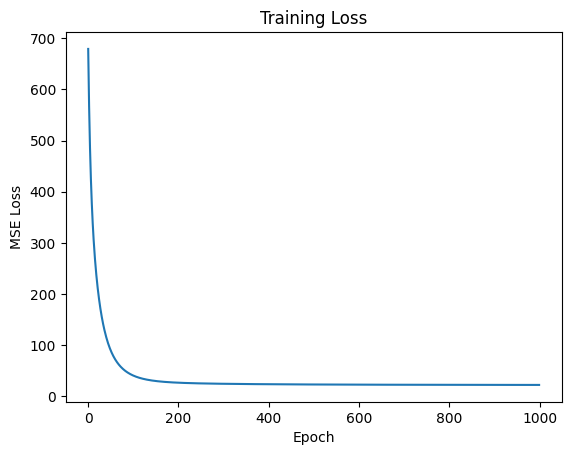

In [10]:
plt.plot(train_losses)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training Loss')
plt.show()

### **9. 평가 데이터에 모델 적용 및 손실 계산**

학습된 모델을 사용하여 평가 데이터에 적용하고 손실을 계산하였습니다.

In [11]:
y_pred_test = X_test.dot(w) + b

test_loss = mse(y_pred_test, y_test)
print(f'Test Loss: {test_loss}')

Test Loss: 28.337114986906382


### **10. 결과 시각화**

실제 타겟 값과 모델의 예측 값을 시각화하여 모델의 성능을 확인하였습니다.

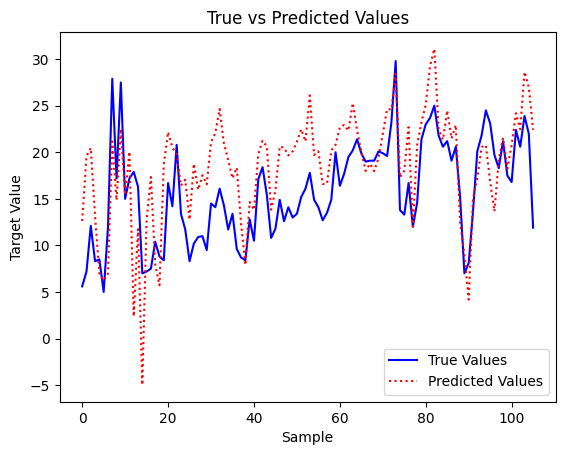

In [12]:
plt.plot(y_test, label='True Values', color='blue')
plt.plot(y_pred_test, label='Predicted Values', color='red', linestyle='dotted')
plt.xlabel('Sample')
plt.ylabel('Target Value')
plt.title('True vs Predicted Values')
plt.legend()
plt.show()